In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv("survey.csv")

df.drop(["Country", "state", "Timestamp", "comments"], axis=1, inplace=True)

# Display the first few rows to understand the structure
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


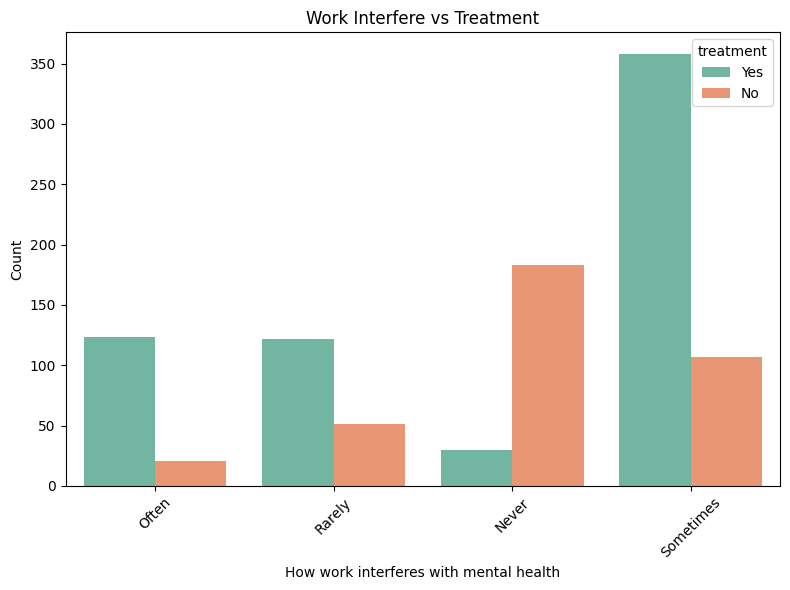

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="work_interfere", hue="treatment", palette="Set2")
plt.title("Work Interfere vs Treatment")
plt.xlabel("How work interferes with mental health")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

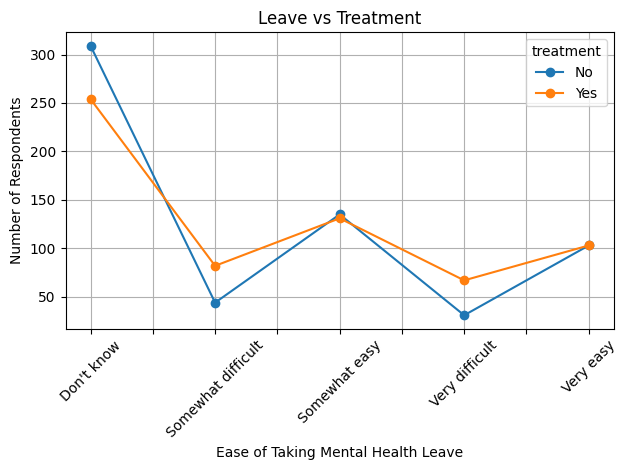

In [3]:
leave_treatment = df.groupby("leave")["treatment"].value_counts().unstack().fillna(0)

plt.figure(figsize=(8, 6))
leave_treatment.plot(marker="o")
plt.title("Leave vs Treatment")
plt.xlabel("Ease of Taking Mental Health Leave")
plt.ylabel("Number of Respondents")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

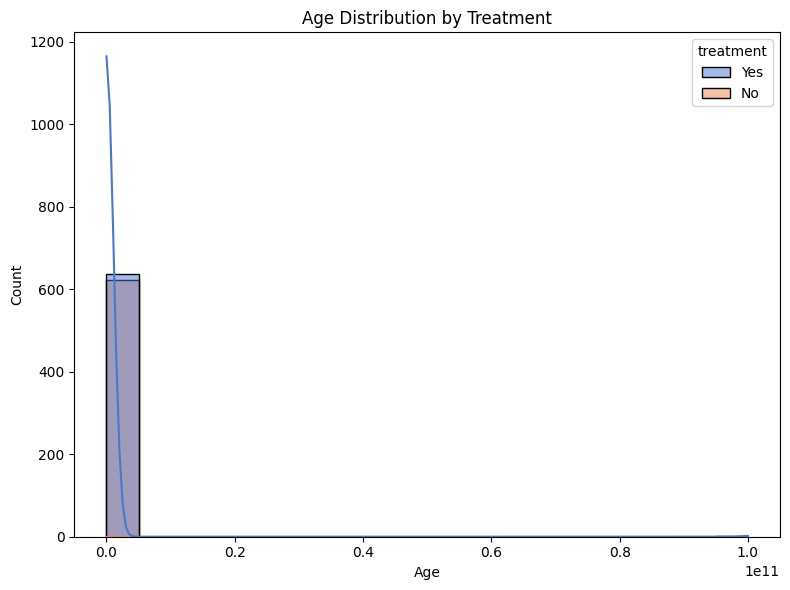

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", hue="treatment", bins=20, kde=True, palette="muted")
plt.title("Age Distribution by Treatment")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\srishti\AppData\Local\Temp\ipykernel_24872\2865798484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enc["supervisor_code"] = LabelEncoder().fit_transform(df_enc["supervisor"])
C:\Users\srishti\AppData\Local\Temp\ipykernel_24872\2865798484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enc["work_interfere_code"] = LabelEncoder().fit_transform(df_enc["work_interfere"])


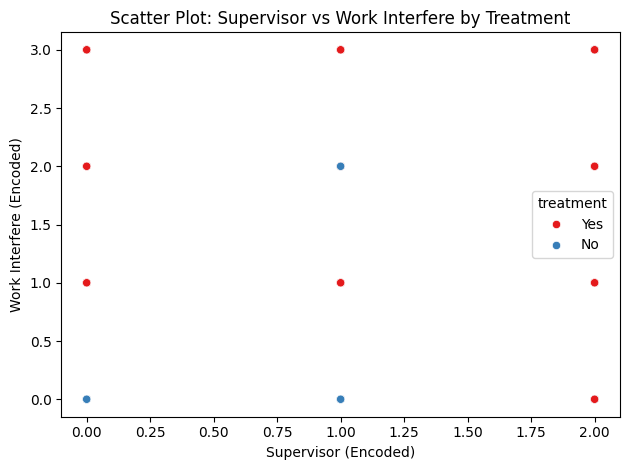

In [16]:
df_enc = df.dropna(subset=["supervisor", "work_interfere", "treatment"])
df_enc["supervisor_code"] = LabelEncoder().fit_transform(df_enc["supervisor"])
df_enc["work_interfere_code"] = LabelEncoder().fit_transform(df_enc["work_interfere"])

sns.scatterplot(
    data=df_enc,
    x="supervisor_code",
    y="work_interfere_code",
    hue="treatment",
    palette="Set1",
)
plt.title("Scatter Plot: Supervisor vs Work Interfere by Treatment")
plt.xlabel("Supervisor (Encoded)")
plt.ylabel("Work Interfere (Encoded)")
plt.tight_layout()
plt.show()

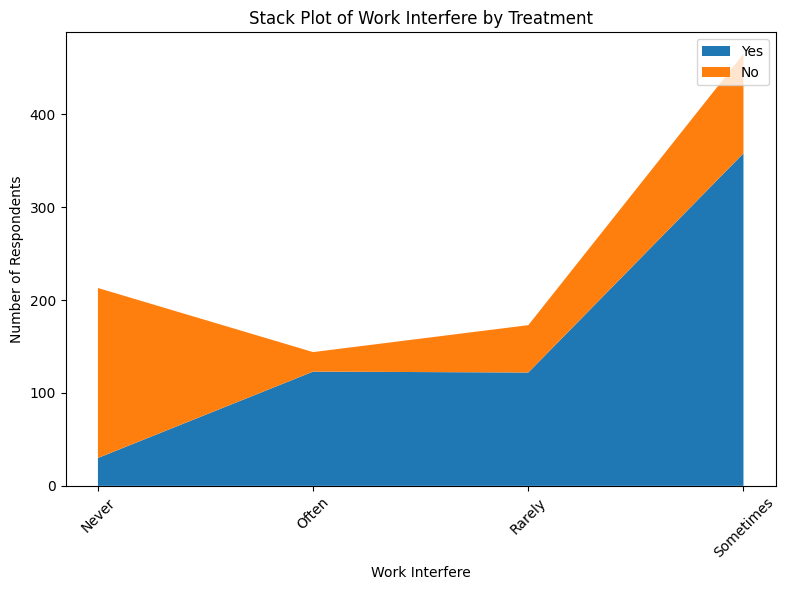

In [7]:
stack_data = df.groupby(["work_interfere", "treatment"]).size().unstack().fillna(0)
x = range(len(stack_data))

plt.figure(figsize=(8, 6))
plt.stackplot(x, stack_data["Yes"], stack_data["No"], labels=["Yes", "No"])
plt.xticks(ticks=x, labels=stack_data.index, rotation=45)
plt.title("Stack Plot of Work Interfere by Treatment")
plt.xlabel("Work Interfere")
plt.ylabel("Number of Respondents")
plt.legend()
plt.tight_layout()
plt.show()

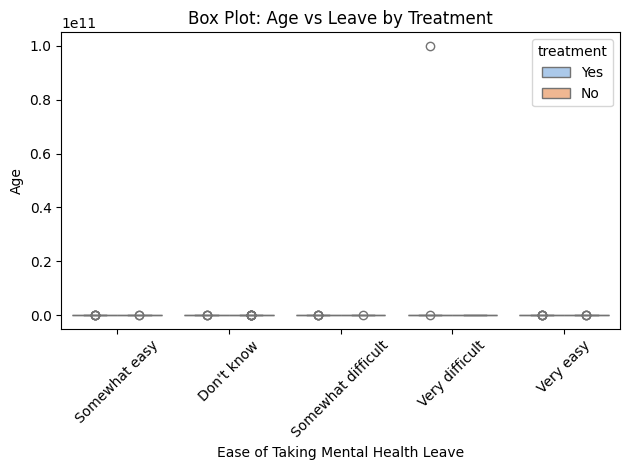

In [13]:
sns.boxplot(data=df, x="leave", y="Age", hue="treatment", palette="pastel")
plt.title("Box Plot: Age vs Leave by Treatment")
plt.xlabel("Ease of Taking Mental Health Leave")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

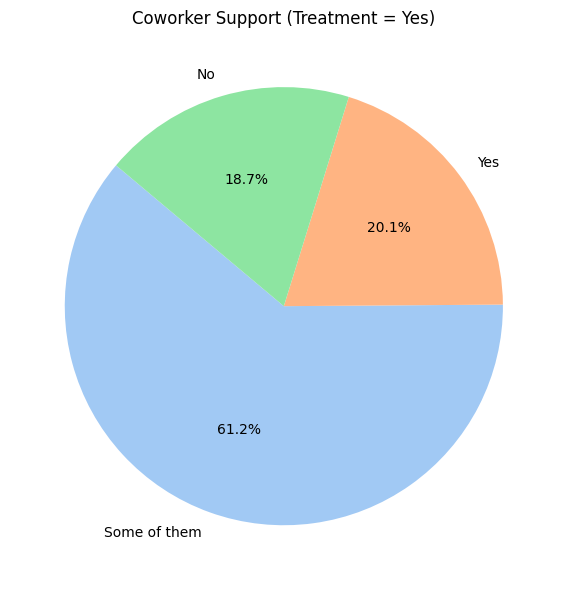

In [9]:
treated = df[df["treatment"] == "Yes"]
coworkers_counts = treated["coworkers"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    coworkers_counts,
    labels=coworkers_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("pastel"),
)
plt.title("Coworker Support (Treatment = Yes)")
plt.tight_layout()
plt.show()

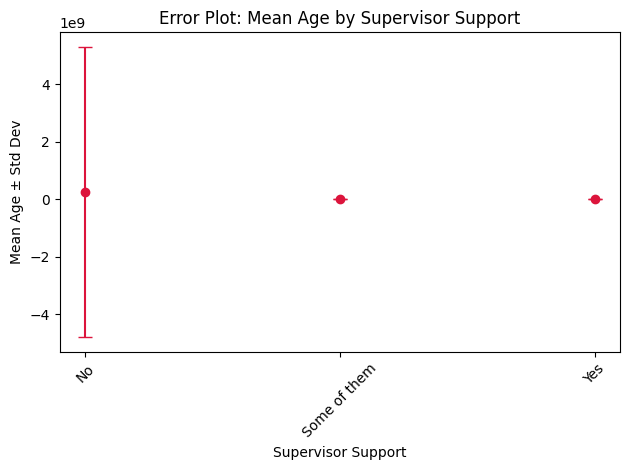

In [14]:
supervisor_stats = df.groupby("supervisor")["Age"].agg(["mean", "std"]).dropna()
plt.errorbar(
    x=supervisor_stats.index,
    y=supervisor_stats["mean"],
    yerr=supervisor_stats["std"],
    fmt="o",
    capsize=5,
    color="crimson",
)
plt.title("Error Plot: Mean Age by Supervisor Support")
plt.xlabel("Supervisor Support")
plt.ylabel("Mean Age ± Std Dev")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

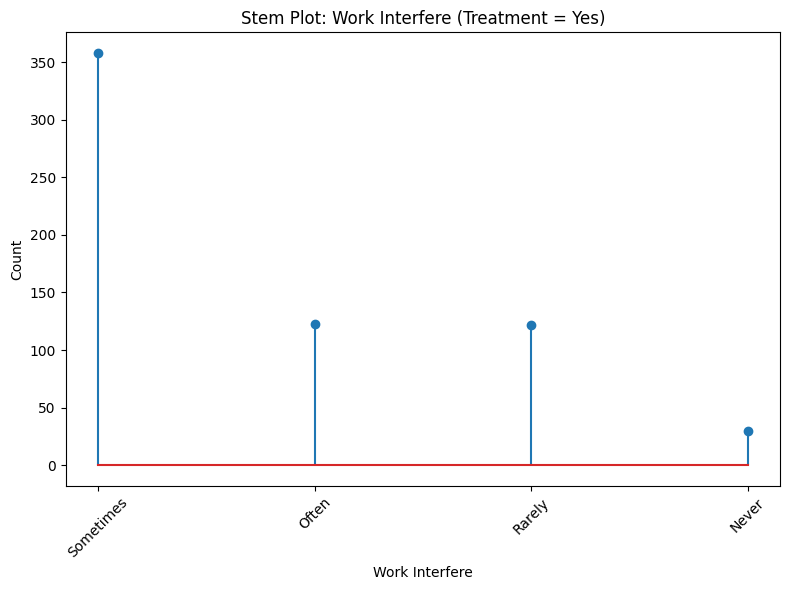

In [17]:
yes_treatment = df[df["treatment"] == "Yes"]
counts = yes_treatment["work_interfere"].value_counts()

plt.figure(figsize=(8, 6))
(markerline, stemlines, baseline) = plt.stem(range(len(counts)), counts.values)
plt.xticks(ticks=range(len(counts)), labels=counts.index, rotation=45)
plt.title("Stem Plot: Work Interfere (Treatment = Yes)")
plt.xlabel("Work Interfere")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

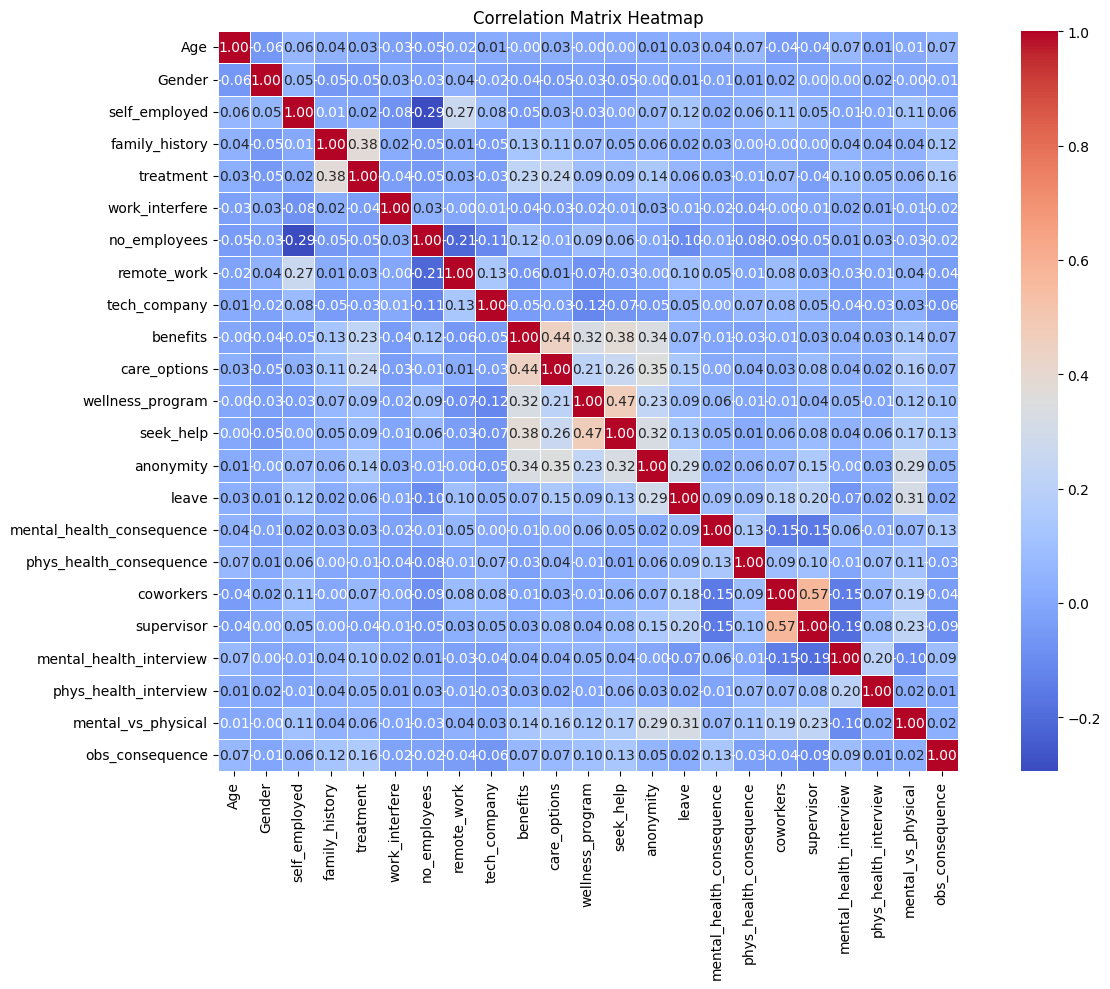

In [20]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using label encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()